In [15]:
import numpy as np # linear algebra
import pandas as pd
import os

train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
val_dir = "../input/chest-xray-pneumonia/chest_xray/val"

In [16]:
from sklearn.datasets import load_files
import numpy as np
import cv2

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
val_x, val_y,_ = load_dataset(val_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  5216
Testing set size :  624


In [17]:
numberOfClasses = len(np.unique(y_train))
numberOfClasses

2

In [18]:
val_y[0:5]


array([0, 0, 1, 1, 1])

In [19]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,numberOfClasses)
y_test = np_utils.to_categorical(y_test,numberOfClasses)

val_y = np_utils.to_categorical(val_y,numberOfClasses)


val_y[0:5]# Note that only one element has value 1 and others are 0.

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [20]:
print('Vaildation X : ',val_x.shape)
print('Vaildation y :',val_y.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (16,)
Vaildation y : (16, 2)
Test X :  (624,)
Test y :  (624, 2)


In [21]:
x_train[0]

'../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1493_bacteria_3896.jpeg'

In [22]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file, target_size=(256,256)))/ 255)
    return images_as_array


In [23]:
x_train = np.array(convert_image_to_array(x_train))
print('Validation set shape : ',x_train.shape)


Validation set shape :  (5216, 256, 256, 3)


In [24]:
val_x = np.array(convert_image_to_array(val_x))
print('Validation set shape : ',val_x.shape)



Validation set shape :  (16, 256, 256, 3)


In [25]:


x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (624, 256, 256, 3)


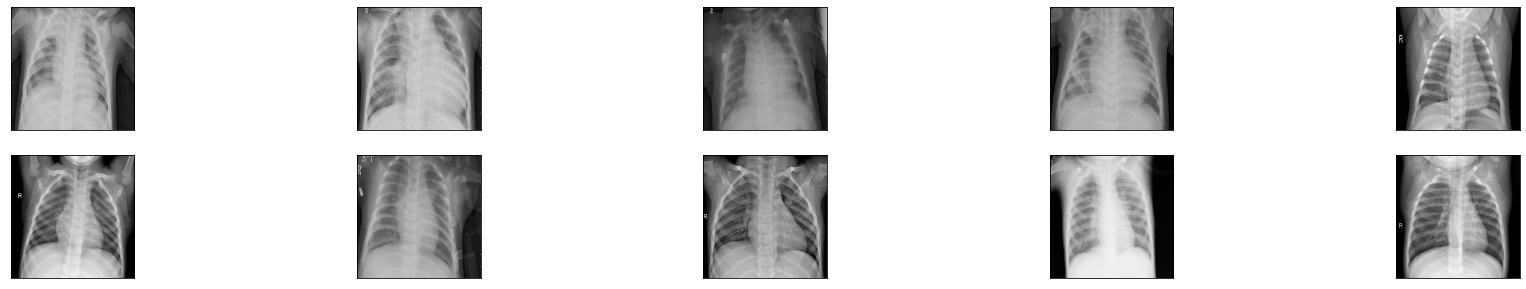

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))